# Human Activity Recognition Using Accelerometer Data

##### https://www.youtube.com/watch?v=lUI6VMj43PE&t=18s
##### https://github.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN

#### Right Wrist

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#plt.rc('font', size=18)
#plt.rcParams['figure.constrained_layout.use'] = False
import sys

In [3]:
df = pd.read_csv('acc_data (right_wrist).csv')
X = np.column_stack((np.array(df['Acc_X']), np.array(df['Acc_Y']), np.array(df['Acc_Z'])))
y = np.array(df['PacketCounter']).reshape(-1, 1)
#lines = df.readlines()

In [4]:
processedList = []

for i, line in enumerate(df):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  0
Error at line number:  1
Error at line number:  2
Error at line number:  3
Error at line number:  4


In [5]:
processedList

[]

In [6]:
columns =['PacketCounter', 'Acc_X', 'Acc_Y', 'Acc_Z']
data = pd.DataFrame(data = df, columns = columns)
data.head()

,PacketCounter,Acc_X,Acc_Y,Acc_Z
0,0,0.000000,0.000000,0.000000
1,1,-8.874124,-0.679627,2.768368
2,2,-8.873473,-0.613973,2.761706
3,3,-8.834931,-0.518206,2.797576
4,4,-8.921975,-0.508252,2.836315


In [7]:
data.shape

(403, 4)

In [8]:
data.info

<bound method DataFrame.info of      PacketCounter     Acc_X     Acc_Y     Acc_Z
0                0  0.000000  0.000000  0.000000
1                1 -8.874124 -0.679627  2.768368
2                2 -8.873473 -0.613973  2.761706
3                3 -8.834931 -0.518206  2.797576
4                4 -8.921975 -0.508252  2.836315
..             ...       ...       ...       ...
398            398 -8.989089 -2.510464  2.123948
399            399 -9.029768 -2.650938  2.112896
400            400 -9.044131 -2.731521  2.112670
401            401 -8.995914 -2.801886  2.085057
402            402 -8.966281 -2.829942  2.044567

[403 rows x 4 columns]>

In [9]:
data.isnull().sum()

PacketCounter    0
Acc_X            0
Acc_Y            0
Acc_Z            0
dtype: int64

In [10]:
data['Acc_X'].value_counts()

-12.740092    1
 7.312884     1
-9.464532     1
-9.102597     1
-5.038197     1
             ..
-9.289584     1
-9.461021     1
-9.007327     1
 0.978909     1
 0.000000     1
Name: Acc_X, Length: 403, dtype: int64

In [11]:
data['Acc_Y'].value_counts()

-2.574710    1
 7.694491    1
-2.659186    1
 3.978233    1
 6.953451    1
            ..
-1.732035    1
-2.875752    1
 1.411068    1
-1.072401    1
 0.000000    1
Name: Acc_Y, Length: 403, dtype: int64

In [12]:
data['Acc_Z'].value_counts()

 4.925340    1
 2.396723    1
 1.982518    1
 2.226224    1
 1.968262    1
            ..
 2.319945    1
 5.938214    1
-1.287984    1
 2.107725    1
 0.000000    1
Name: Acc_Z, Length: 403, dtype: int64

In [13]:
data['Acc_X'] = data['Acc_X'].astype('float')
data['Acc_Y'] = data['Acc_Y'].astype('float')
data['Acc_Z'] = data['Acc_Z'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PacketCounter  403 non-null    int64  
 1   Acc_X          403 non-null    float64
 2   Acc_Y          403 non-null    float64
 3   Acc_Z          403 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.7 KB


In [15]:
Fs = 20
dance = data['Acc_X'].value_counts().index
dance

Float64Index([       -12.74009228,         7.312883854,  -9.464531897999999,
               -9.102597237000001,        -5.038196564,         0.301210463,
                      -9.23391819,        -9.625092506,        -12.51551151,
               0.5726978779999999,
              ...
                      1.213837385,  -9.082893372000001,        -9.205843925,
                     -9.480053902, -10.993315699999998,         -9.28958416,
                     -9.461021423,         -9.00732708,         0.978908658,
                              0.0],
             dtype='float64', length=403)

In [16]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

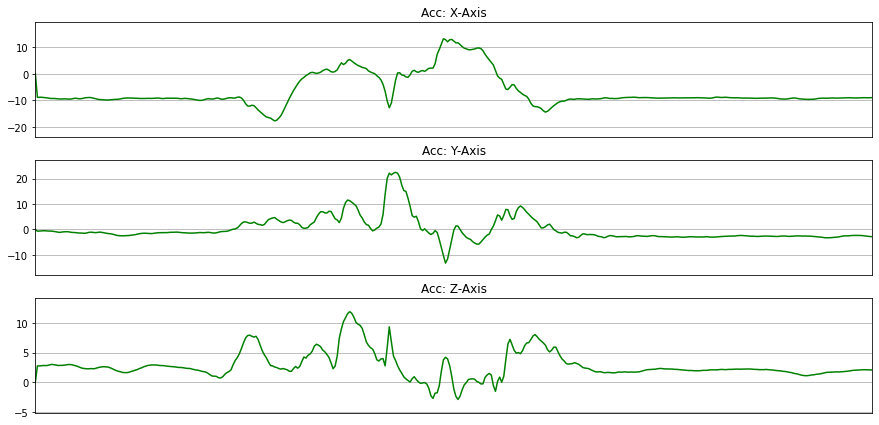

In [17]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
plot_axis(ax0, data['PacketCounter'], data['Acc_X'], 'Acc: X-Axis')
plot_axis(ax1, data['PacketCounter'], data['Acc_Y'], 'Acc: Y-Axis')
plot_axis(ax2, data['PacketCounter'], data['Acc_Z'], 'Acc: Z-Axis')
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(top=0.90)
plt.show()

In [18]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['PacketCounter'])
data.head()

,PacketCounter,Acc_X,Acc_Y,Acc_Z,label
0,0,0.000000,0.000000,0.000000,0
1,1,-8.874124,-0.679627,2.768368,1
2,2,-8.873473,-0.613973,2.761706,2
3,3,-8.834931,-0.518206,2.797576,3
4,4,-8.921975,-0.508252,2.836315,4


In [19]:
label.classes_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:
# array(['Acc_X', 'Acc_Y', 'Acc_Z'], dtype=object)

In [19]:
X = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = data['label']

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,label
0,1.065724,-0.010709,-1.222835,0
1,-0.378791,-0.153964,-0.015481,1
2,-0.378685,-0.140125,-0.018386,2
3,-0.372411,-0.119939,-0.002742,3
4,-0.386580,-0.117841,0.014152,4


In [21]:
import scipy.stats as stats

In [22]:
Fs = 1
frame_size = Fs*2 # 80
hop_size = Fs*1 # 40

In [23]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['Acc_X'].values[i: i + frame_size]
        y = df['Acc_Y'].values[i: i + frame_size]
        z = df['Acc_Z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((401, 2, 3), (401,))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape, X_test.shape

((320, 2, 3), (81, 2, 3))

In [27]:
X_train[0].shape, X_test[0].shape

((2, 3), (2, 3))

In [28]:
X_train = X_train.reshape(320, 2, 3, 1)
X_test = X_test.reshape(81, 2, 3, 1)

In [29]:
X_train[0].shape, X_test[0].shape

((2, 3, 1), (2, 3, 1))

#### 2D CNN Model

In [30]:
model = Sequential()
model.add(Conv2D(16, (2, 2), padding='same', activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(405, activation='softmax'))


In [31]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Train on 320 samples, validate on 81 samples
Epoch 1/10
320/320 [==============================] - 0s 1ms/sample - loss: 6.0563 - accuracy: 0.0000e+00 - val_loss: 6.0980 - val_accuracy: 0.0000e+00
Epoch 2/10
320/320 [==============================] - 0s 69us/sample - loss: 5.9662 - accuracy: 0.0094 - val_loss: 6.2721 - val_accuracy: 0.0000e+00
Epoch 3/10
320/320 [==============================] - 0s 59us/sample - loss: 5.8720 - accuracy: 0.0094 - val_loss: 6.9712 - val_accuracy: 0.0000e+00
Epoch 4/10
320/320 [==============================] - 0s 59us/sample - loss: 5.6919 - accuracy: 0.0063 - val_loss: 7.8645 - val_accuracy: 0.0000e+00
Epoch 5/10
320/320 [==============================] - 0s 65us/sample - loss: 5.4973 - accuracy: 0.0094 - val_loss: 8.0314 - val_accuracy: 0.0000e+00
Epoch 6/10
320/320 [==============================] - 0s 62us/sample - loss: 5.2907 - accuracy: 0.0094 - val_loss: 8.8282 - val_accuracy: 0.0000e+00
Epoch 7/10
320/320 [==============================] - 0s 6

In [33]:
model.evaluate(X_test, y_test)

81/81 [==============================] - 0s 62us/sample - loss: 10.5805 - accuracy: 0.0000e+00


[10.580475901379998, 0.0]

In [35]:
num_classes  = 400
model = keras.Sequential()
model.add(Conv2D(16, (3,3), padding='same', input_shape=X_train.shape[1:],activation='relu'))
model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 2, 3, 16)          160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 2, 16)          2320      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 2, 32)          4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 32)          9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)              

In [37]:
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/10
288/288 [==============================] - 0s 59us/sample - loss: 6.0229 - accuracy: 0.0000e+00 - val_loss: 6.0634 - val_accuracy: 0.0000e+00
Epoch 2/10
288/288 [==============================] - 0s 42us/sample - loss: 6.0193 - accuracy: 0.0035 - val_loss: 6.0644 - val_accuracy: 0.0000e+00
Epoch 3/10
288/288 [==============================] - 0s 45us/sample - loss: 6.0139 - accuracy: 0.0069 - val_loss: 6.0660 - val_accuracy: 0.0000e+00
Epoch 4/10
288/288 [==============================] - 0s 42us/sample - loss: 6.0077 - accuracy: 0.0069 - val_loss: 6.0684 - val_accuracy: 0.0000e+00
Epoch 5/10
288/288 [==============================] - 0s 38us/sample - loss: 6.0025 - accuracy: 0.0035 - val_loss: 6.0720 - val_accuracy: 0.0000e+00
Epoch 6/10
288/288 [==============================] - 0s 42us/sample - loss: 5.9996 - accuracy: 0.0035 - val_loss: 6.0772 - val_accuracy: 0.0000e+00
Epoch 7/10
288/288 [==============================] - 0s 

In [39]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


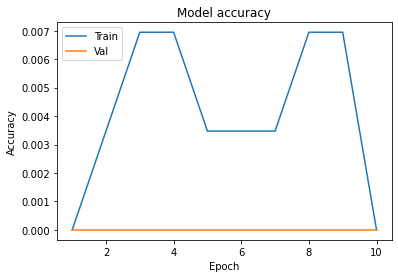

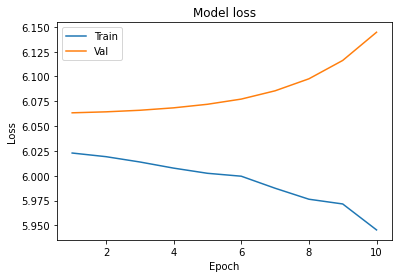

In [40]:
plot_learningCurve(history, 10)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict_classes(X_train)
print(confusion_matrix(y_train, y_pred))
#print(classification_report(y_train, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_train, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
